In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# 한글 폰트 깨짐 방지
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
data = pd.read_csv("../../Data/Jeju/201901-202003.csv")
submission = pd.read_csv("../../Data/Jeju/submission.csv")

- REG_YYMM: 년월
- CARD_SIDO_NM: 카드이용지역_시도 (가맹점 주소 기준)
- CARD_CCG_NM: 카드이용지역_시군구 (가맹점 주소 기준)
- STD_CLSS_NM: 업종명
- HOM_SIDO_NM: 거주지역_시도 (고객 집주소 기준)
- HOM_CCG_NM: 거주지역_시군구 (고객 집주소 기준)
- AGE: 연령대
- SEX_CTGO_CD: 성별 (1: 남성, 2: 여성)
- FLC: 가구생애주기 (1: 1인가구, 2: 영유아자녀가구, 3: 중고생자녀가구, 4: 성인자녀가구, 5: 노년가구)
- CSTMR_CNT: 이용고객수 (명)
- AMT: 이용금액 (원)
- CNT: 이용건수 (건)

In [4]:
data.head()

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [5]:
data = data.rename(columns={'REG_YYMM': 'date',
                            'CARD_SIDO_NM': 'seller_location_1', 'CARD_CCG_NM': 'seller_location_2',
                            'STD_CLSS_NM': 'kind',
                            'HOM_SIDO_NM': 'customer_location_1', 'HOM_CCG_NM': 'customer_location_2',
                            'AGE': 'age', 'SEX_CTGO_CD': 'sex', 'CSTMR_CNT': 'number_of_customer',
                            'AMT': 'amount', 'CNT': 'count'})

In [17]:
data.head()

,date,seller_location_1,seller_location_2,kind,customer_location_1,customer_location_2,age,sex,FLC,number_of_customer,amount,count
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3


In [22]:
# 판매자 위치
print(data.seller_location_1.unique()) # 17개 시도
print(data.seller_location_2.unique())

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강릉시' '고성군' '동해시' '삼척시' '속초시' '양구군' '양양군' '영월군' '원주시' '인제군' '정선군' '철원군'
 '춘천시' '태백시' '평창군' '홍천군' '화천군' '횡성군' '가평군' '고양시 덕양구' '고양시 일산동구' '고양시 일산서구'
 '과천시' '광명시' '광주시' '구리시' '군포시' '김포시' '남양주시' '동두천시' '부천시' '성남시 분당구'
 '성남시 수정구' '성남시 중원구' '수원시 권선구' '수원시 영통구' '수원시 장안구' '수원시 팔달구' '시흥시'
 '안산시 단원구' '안산시 상록구' '안성시' '안양시 동안구' '안양시 만안구' '양주시' '양평군' '여주시' '연천군'
 '오산시' '용인시 기흥구' '용인시 수지구' '용인시 처인구' '의왕시' '의정부시' '이천시' '파주시' '평택시' '포천시'
 '하남시' '화성시' '거제시' '거창군' '김해시' '남해군' '밀양시' '사천시' '산청군' '양산시' '의령군' '진주시'
 '창녕군' '창원시 마산합포구' '창원시 마산회원구' '창원시 성산구' '창원시 의창구' '창원시 진해구' '통영시' '하동군'
 '함안군' '함양군' '합천군' '경산시' '경주시' '고령군' '구미시' '군위군' '김천시' '문경시' '봉화군' '상주시'
 '성주군' '안동시' '영덕군' '영양군' '영주시' '영천시' '예천군' '울릉군' '울진군' '의성군' '청도군' '청송군'
 '칠곡군' '포항시 남구' '포항시 북구' '광산구' '남구' '동구' '북구' '서구' '달서구' '달성군' '수성구' '중구'
 '대덕구' '유성구' '강서구' '금정구' '기장군' '동래구' '부산진구' '사상구' '사하구' '수영구' '연제구' '영도구'
 '해운대구' '강남구' '강동구' '강북구' '관악구' '광진구' '구로구' '

In [23]:
# 판매 종류
data.kind.unique()

array(['건강보조식품 소매업', '골프장 운영업', '과실 및 채소 소매업', '관광 민예품 및 선물용품 소매업',
       '그외 기타 스포츠시설 운영업', '그외 기타 종합 소매업', '기타 대형 종합 소매업', '기타 외국식 음식점업',
       '기타 주점업', '기타음식료품위주종합소매업', '마사지업', '비알콜 음료점업', '빵 및 과자류 소매업',
       '서양식 음식점업', '수산물 소매업', '슈퍼마켓', '스포츠 및 레크레이션 용품 임대업', '여관업', '욕탕업',
       '육류 소매업', '일반유흥 주점업', '일식 음식점업', '전시 및 행사 대행업', '중식 음식점업',
       '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점', '피자 햄버거 샌드위치 및 유사 음식점업',
       '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업', '여행사업', '자동차 임대업',
       '면세점', '버스 운송업', '택시 운송업', '기타 수상오락 서비스업', '내항 여객 운송업',
       '그외 기타 분류안된 오락관련 서비스업', '정기 항공 운송업'], dtype=object)

In [24]:
data.age.unique()

array(['20s', '30s', '40s', '50s', '60s', '70s', '10s'], dtype=object)

## Visualization

### - Mean price of each product

In [44]:
temp = data.groupby("kind")[['amount', 'count']].sum()
temp['mean_price'] = temp['amount'] / temp['count']

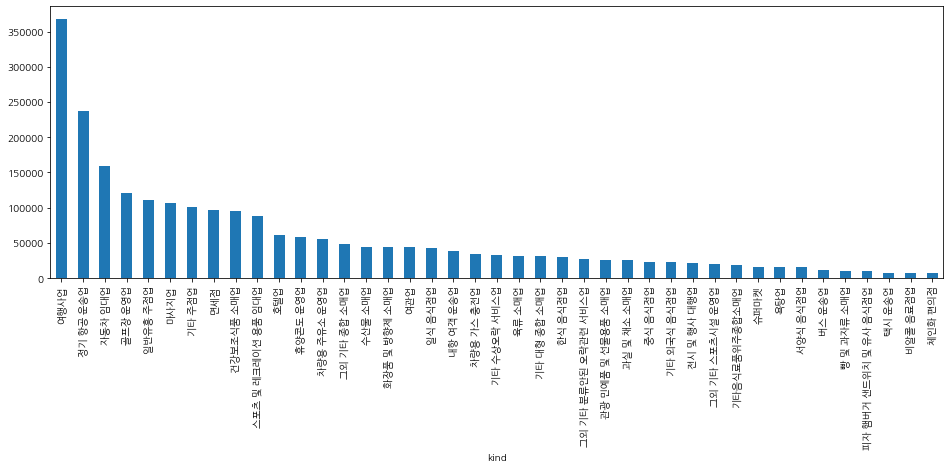

In [49]:
temp['mean_price'].sort_values(ascending=False).plot(kind='bar', figsize=(16,5))

# 여행사업이 가장 비쌈
# 편의점이 가장 쌈

### - Total number of counts

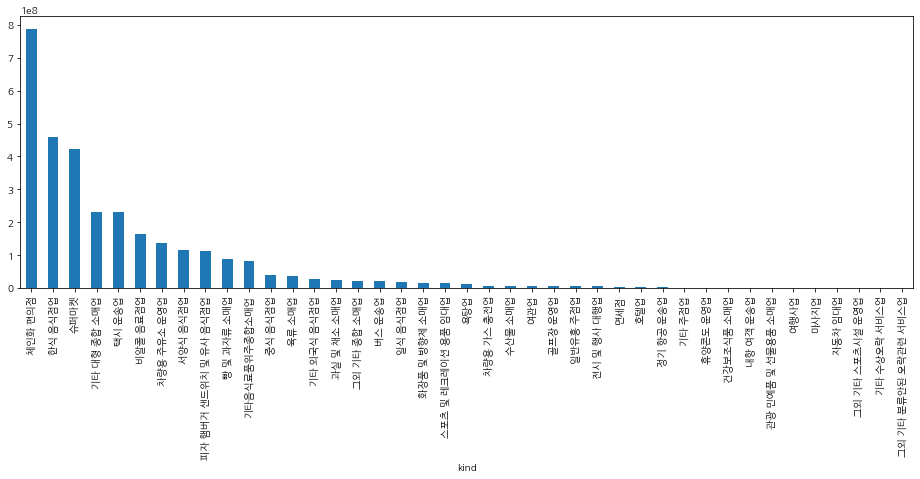

In [50]:
temp['count'].sort_values(ascending=False).plot(kind='bar', figsize=(16,5))

# 편의점의 거래 횟수가 압도적으로 많음

### - Total sales

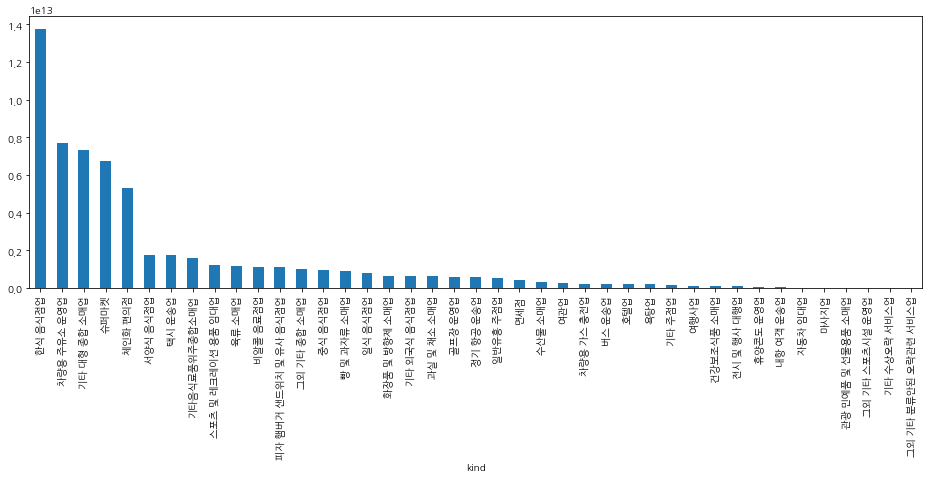

In [65]:
temp['amount'].sort_values(ascending=False).plot(kind='bar', figsize=(16,5))

# 한식 음식점의 매출이 가장 많음.
# 기타 대형 종합 소매업: 홈플러스?

### - Seller location

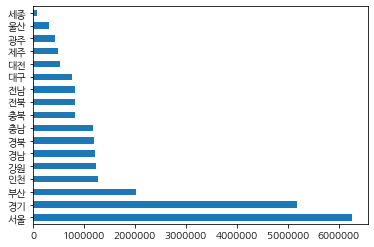

In [67]:
data.seller_location_1.value_counts().plot.barh()

### - Sex of customer

In [98]:
temp = data.groupby('sex')[['amount', 'count']].sum()

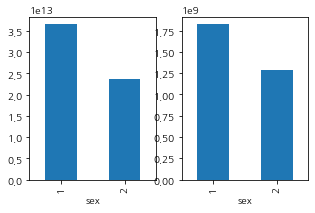

In [105]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(5, 3))
temp.amount.plot(ax=axes[0], kind='bar')
temp['count'].plot(ax=axes[1], kind='bar')

# 1: male
# 2: female

### - Rate of sex

In [17]:
temp = data.copy()
temp['male'] = temp['sex'].map(lambda x: 1 if x == 1 else 0)
temp['female'] = temp['sex'].map(lambda x: 1 if x == 2 else 0)

In [18]:
temp['male_count'] = temp['male']*temp['count']
temp['female_count'] = temp['female']*temp['count']

temp['male_amount'] = temp['male']*temp['amount']
temp['female_amount'] = temp['female']*temp['amount']

In [34]:
temp_a = temp.groupby('kind')[['male_count', 'female_count', 'male_amount', 'female_amount', 'amount', 'count']].sum()

Text(0.5, 1.0, 'number of purchase by sex')

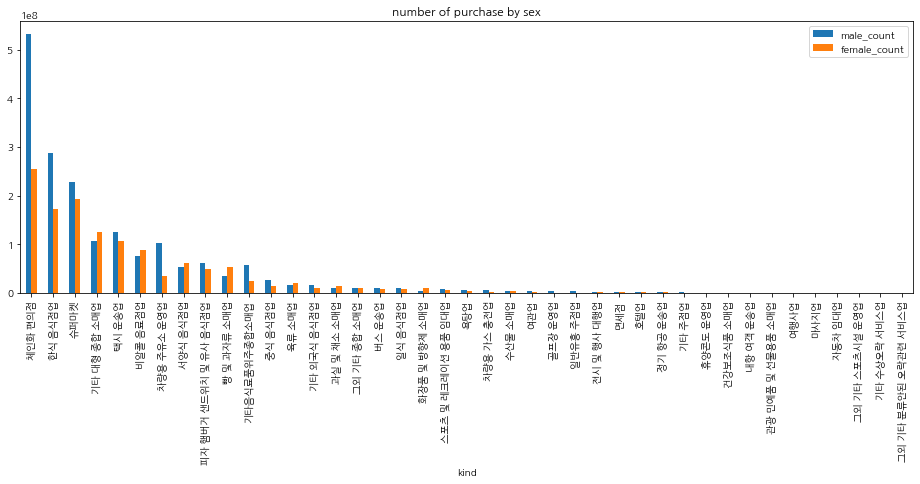

In [38]:
temp_a.sort_values(by='count', ascending=False)[['male_count', 'female_count']].plot(kind='bar', figsize=(16,5))
plt.title("number of purchase by sex")

# 편의점 매출에서는 남자가 여자의 약 2배(담배?)

Text(0.5, 1.0, 'total purchase by sex')

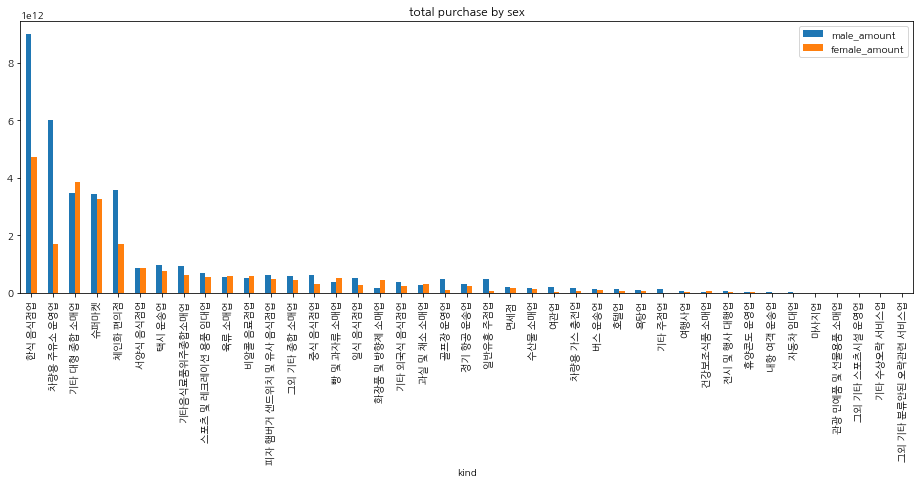

In [39]:
temp_a.sort_values(by='amount', ascending=False)[['male_amount', 'female_amount']].plot(kind='bar', figsize=(16,5))
plt.title("total purchase by sex")

In [81]:
data.loc[data['age']=='10s', 'age'] = 10
data.loc[data['age']=='20s', 'age'] = 20
data.loc[data['age']=='30s', 'age'] = 30
data.loc[data['age']=='40s', 'age'] = 40
data.loc[data['age']=='50s', 'age'] = 50
data.loc[data['age']=='60s', 'age'] = 60
data.loc[data['age']=='70s', 'age'] = 70

## Visualization of each kind of product 
### - location, age, sex, number of customer, amount
**구매 횟수 top 5**
- 체인화 편의점
- 한식 음식점업
- 슈퍼마켓
- 기타 대형 종합 소매업
- 택시 운송업

**매출액 top 5**
- 한식 음식점업(겹침)
- 차량용 주유소 운영업
- 기타 대형 종합 소매업(겹침)
- 슈퍼마켓(겹침)
- 체인화 편의점(겹침)

In [23]:
def visualization(product):
    temp = data[data['kind']==product].copy()
    temp['male'] = temp['sex'].map(lambda x: 1 if x == 1 else 0)
    temp['female'] = temp['sex'].map(lambda x: 1 if x == 2 else 0)
    
    temp['male_count'] = temp['male']*temp['count']
    temp['female_count'] = temp['female']*temp['count']

    temp['male_amount'] = temp['male']*temp['amount']
    temp['female_amount'] = temp['female']*temp['amount']
    
    # groupby age
    temp_age = temp.groupby('age', as_index=False)[['male_count', 'female_count', 'male_amount', 'female_amount']].sum()
    # groupby location
    temp_location_customer = temp.groupby("customer_location_1", as_index=False)[['amount', 'count']].sum()
    temp_location_seller = temp.groupby("seller_location_1", as_index=False)[['amount', 'count']].sum()
    
    fit, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))
    fit.suptitle(product, fontsize=16)
    fig, ax2 = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
    
    ax1[0].set_title("Number of sales")
    temp_age.plot(x='age', y='male_count', ax=ax1[0])
    temp_age.plot(x='age', y='female_count', ax=ax1[0])

    ax1[1].set_title("Total sales")
    temp_age.plot(x='age', y='male_amount', ax=ax1[1])
    temp_age.plot(x='age', y='female_amount', ax=ax1[1])
    
    ax2[0].set_title("Number of purchase")
    temp_location_customer.plot(x='customer_location_1', y='count', ax=ax2[0], label='customer', kind='bar', color='r', alpha=0.5)
    temp_location_seller.plot(x='seller_location_1', y='count', ax=ax2[0], label='seller', kind='bar', alpha=0.5)

    ax2[1].set_title("Total Sales")
    temp_location_customer.plot(x='customer_location_1', y='amount', ax=ax2[1], label='customer', kind='bar', color='r', alpha=0.5)
    temp_location_seller.plot(x='seller_location_1', y='amount', ax=ax2[1], label='seller', kind='bar', alpha=0.5)

    plt.show()

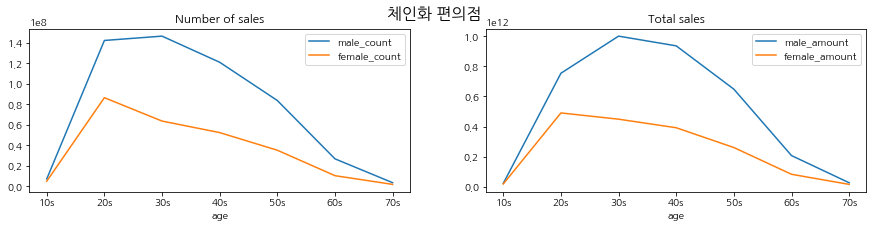

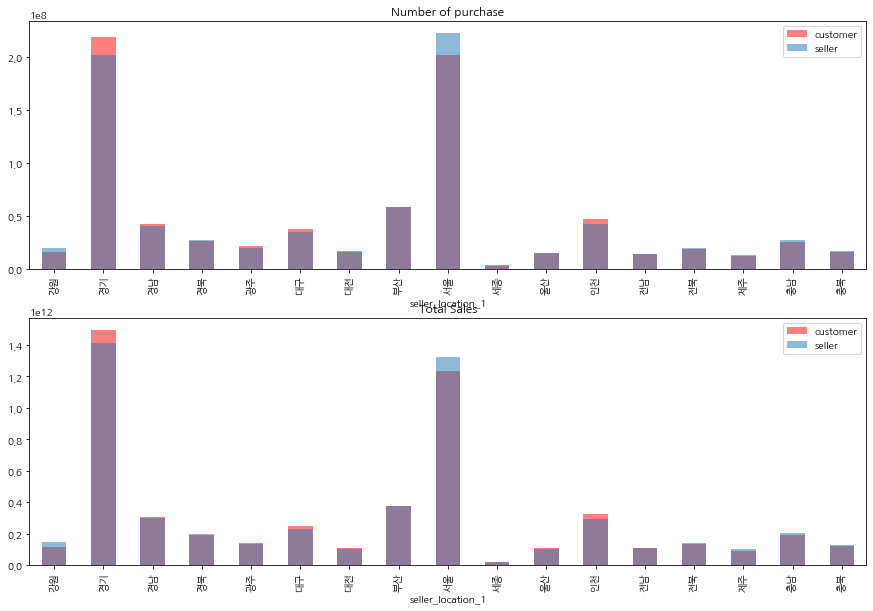

In [24]:
visualization('체인화 편의점')

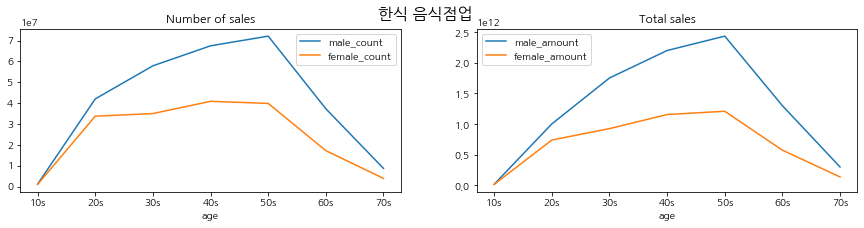

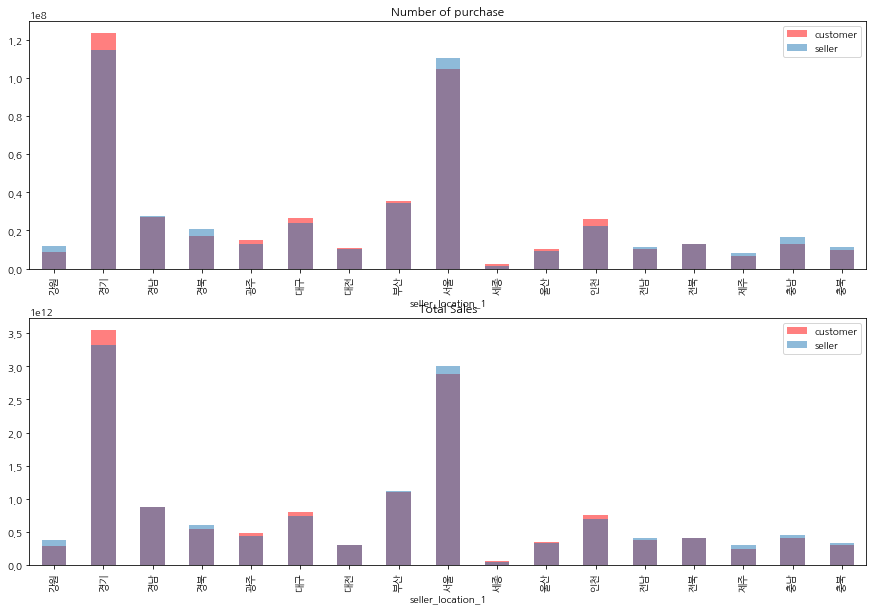

In [25]:
visualization('한식 음식점업')

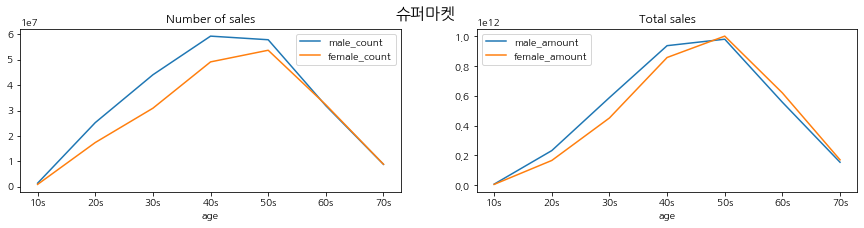

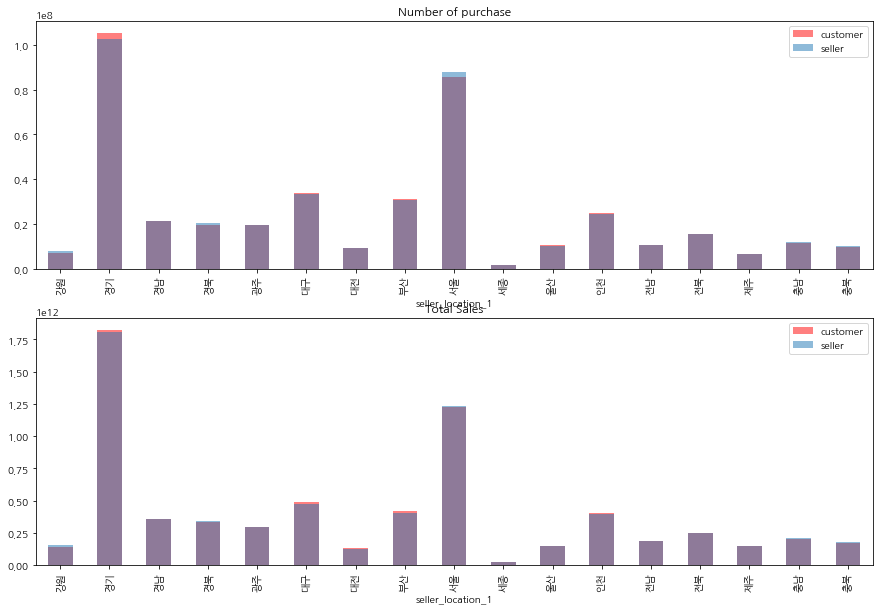

In [26]:
visualization('슈퍼마켓')

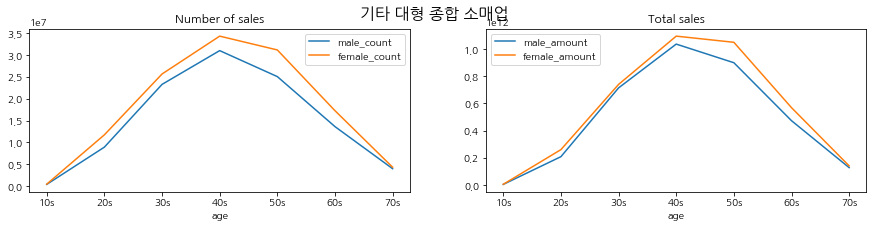

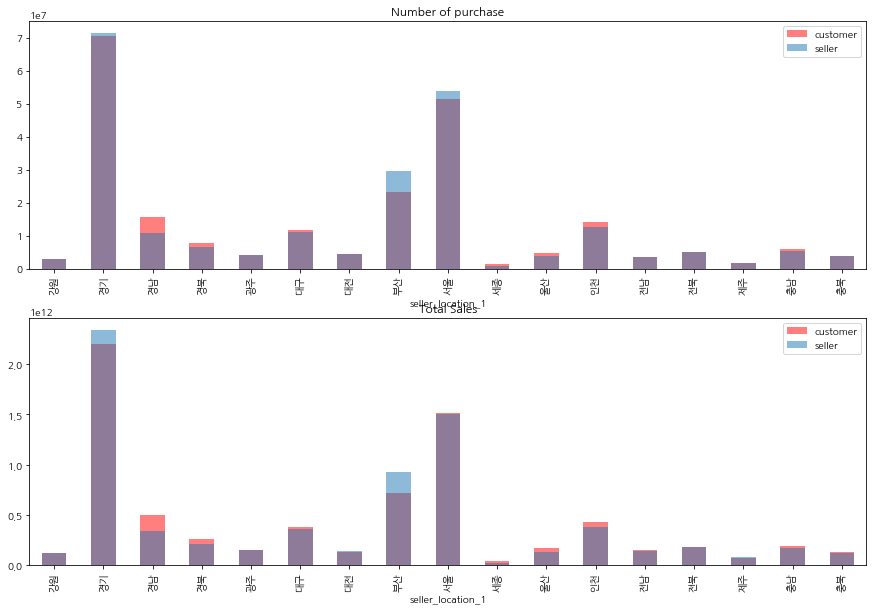

In [27]:
visualization('기타 대형 종합 소매업')

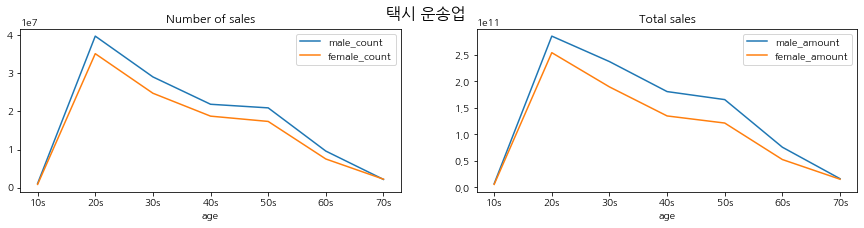

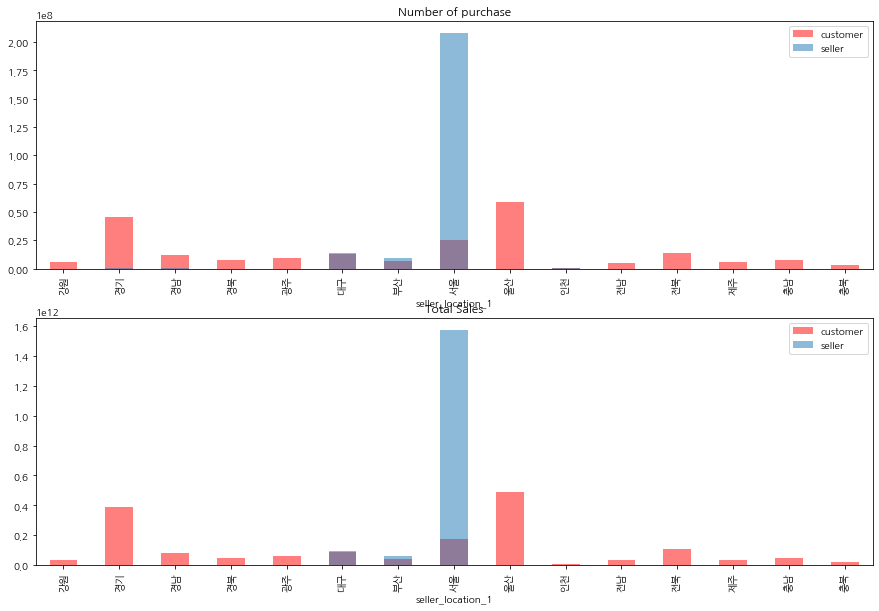

In [28]:
visualization('택시 운송업')

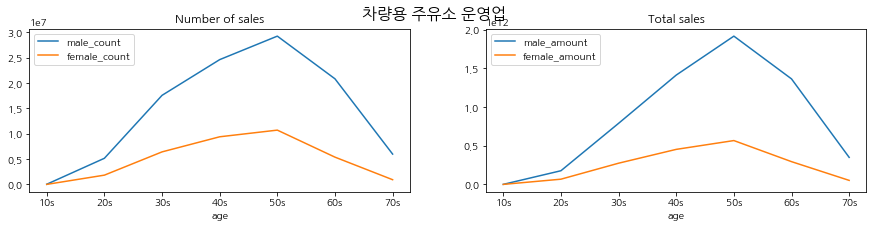

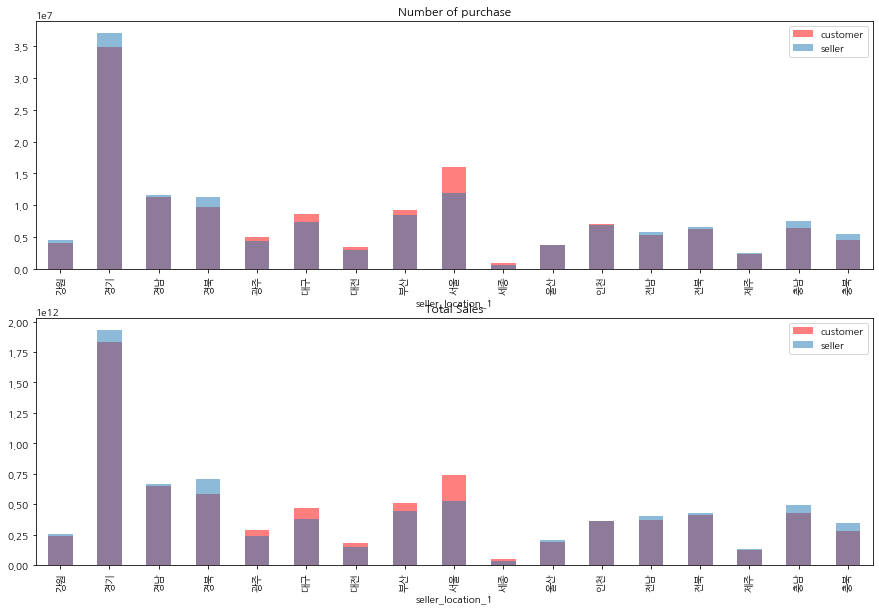

In [29]:
visualization('차량용 주유소 운영업')

# 택시에 영향을 받음?? -> 택시는 LNG
# 남자가 운전을 더 많이함?

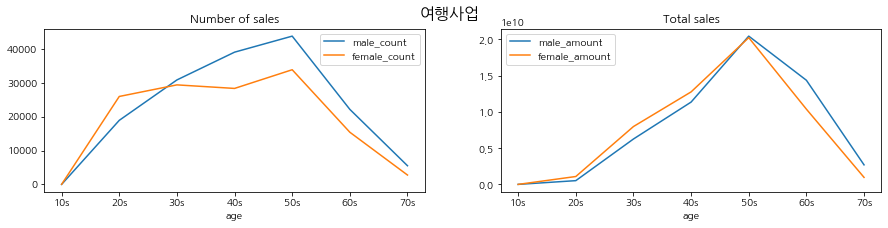

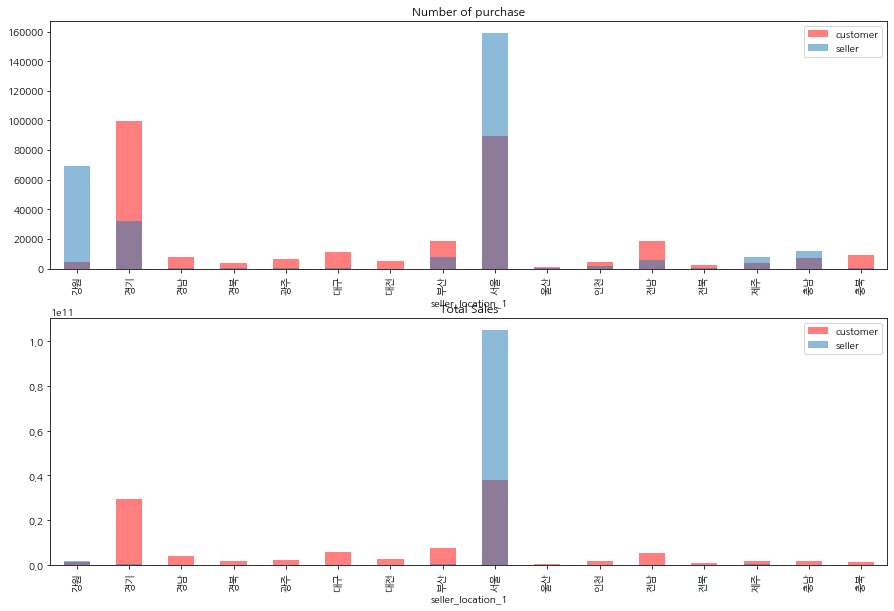

In [30]:
visualization('여행사업')

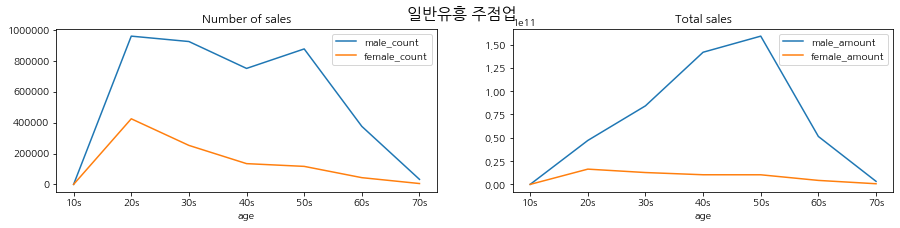

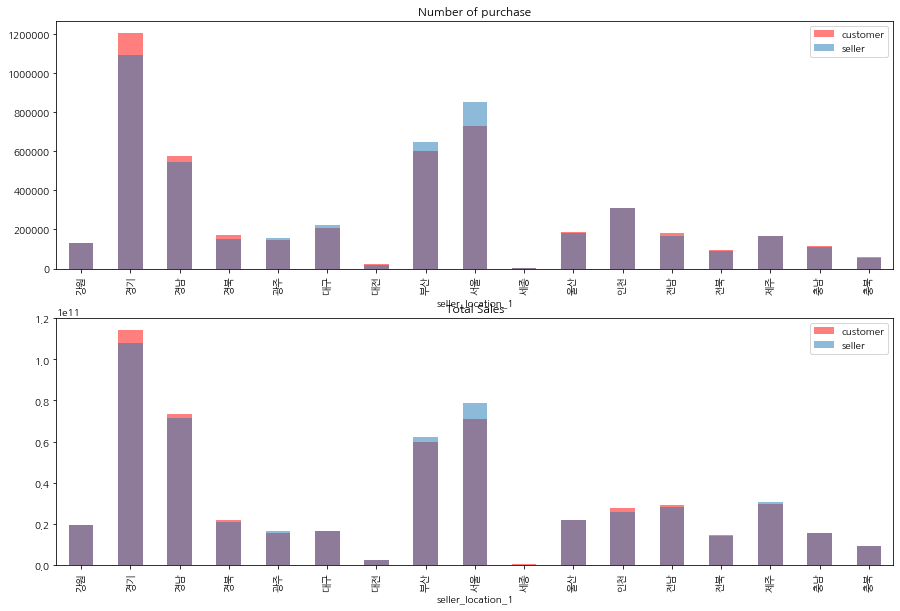

In [31]:
visualization('일반유흥 주점업')

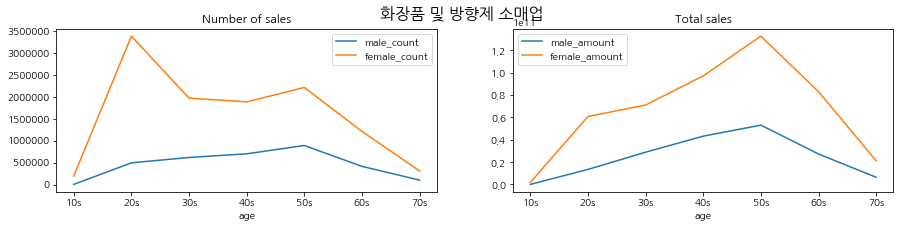

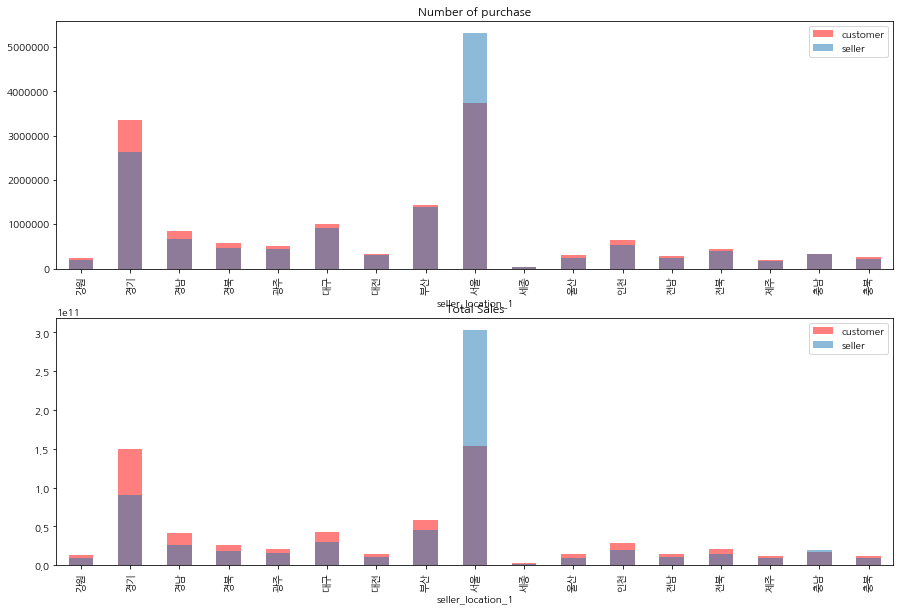

In [32]:
visualization('화장품 및 방향제 소매업')

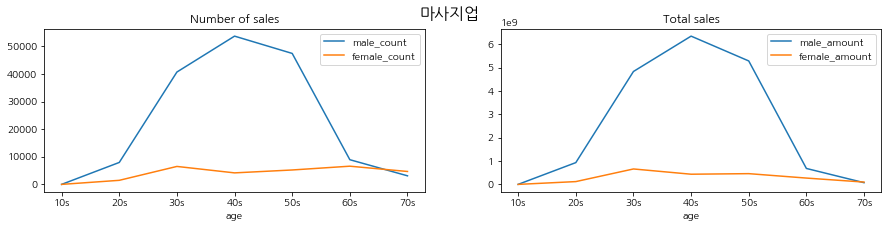

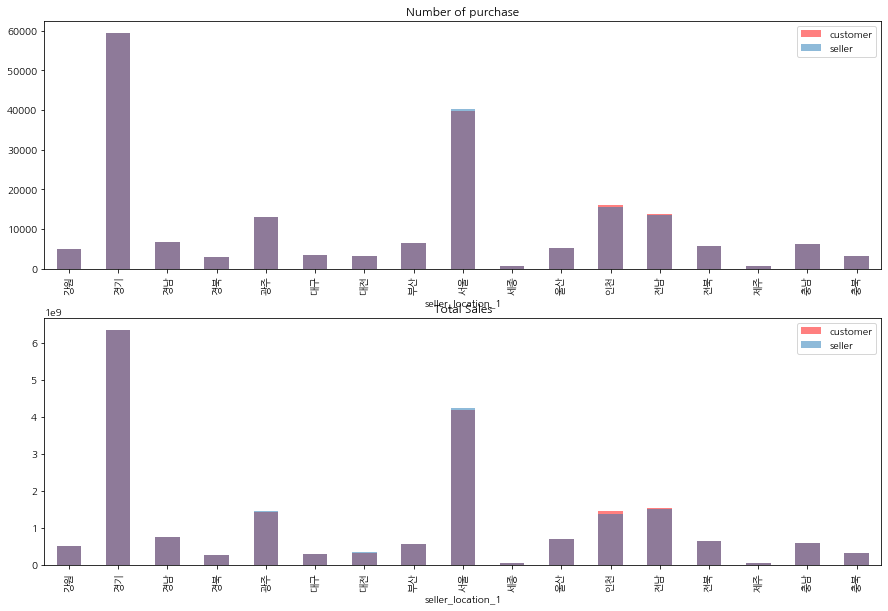

In [33]:
visualization('마사지업')